What can we say about the success of a movie before it is released? Are there certain companies (Pixar?) that have found a consistent formula? Given that major films costing over $100 million to produce can still flop, this question is more important than ever to the industry. Film aficionados might have different interests. Can we predict which films will be highly rated, whether or not they are a commercial success?

This is a great place to start digging in to those questions, with data on the plot, cast, crew, budget, and revenues of several thousand films.

__Data Source Transfer Summary__

We (Kaggle) have removed the original version of this dataset per a DMCA takedown request from IMDB. In order to minimize the impact, we're replacing it with a similar set of films and data fields from The Movie Database (TMDb) in accordance with their terms of use. The bad news is that kernels built on the old dataset will most likely no longer work.

__Data Source Transfer Details__

    Several of the new columns contain json. You can save a bit of time by porting the load data functions [from this kernel]().
    Even in simple fields like runtime may not be consistent across versions. For example, previous dataset shows the duration for Avatar's extended cut while TMDB shows the time for the original version.
    There's now a separate file containing the full credits for both the cast and crew.
    All fields are filled out by users so don't expect them to agree on keywords, genres, ratings, or the like.
    If you are curious about how this dataset was prepared, the code to access TMDb's API is posted here.

__New columns:__

    -homepage
    -id
    -original_title
    -overview
    -popularity
    -production_companies
    -production_countries
    -release_date
    -spoken_languages
    -status
    -tagline
    -vote_average


__Open Questions About the Data__

There are some things we haven't had a chance to confirm about the new dataset.
    1.Are the budgets and revenues all in US dollars? Do they consistently show the global revenues?
    2.This dataset hasn't yet gone through a data quality analysis. Can you find any obvious corrections? For example, in the IMDb version it was necessary to treat values of zero in the budget field as missing. Similar findings would be very helpful to your fellow Kagglers! (It's probably a good idea to keep treating zeros as missing, with the caveat that missing budgets much more likely to have been from small budget films in the first place).

__Acknowledgements__

This dataset was generated from The Movie Database API. This product uses the TMDb API but is not endorsed or certified by TMDb.
Their API also provides access to data on many additional movies, actors and actresses, crew members, and TV shows. You can try it for yourself here.

In [52]:
#Importing Libraries
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

In [6]:
# These both data set contain the information about the 5000 movies.
movies=pd.read_csv('tmdb_5000_movies.csv')
credits=pd.read_csv('tmdb_5000_credits.csv')

In [7]:
movies.head(3)

,budget,genres,homepage,id,keywords,original_language,original_title,overview,popularity,production_companies,production_countries,release_date,revenue,runtime,spoken_languages,status,tagline,title,vote_average,vote_count
0,237000000,"[{""id"": 28, ""name"": ""Action""}, {""id"": 12, ""nam...",http://www.avatarmovie.com/,19995,"[{""id"": 1463, ""name"": ""culture clash""}, {""id"":...",en,Avatar,"In the 22nd century, a paraplegic Marine is di...",150.437577,"[{""name"": ""Ingenious Film Partners"", ""id"": 289...","[{""iso_3166_1"": ""US"", ""name"": ""United States o...",2009-12-10,2787965087,162.0,"[{""iso_639_1"": ""en"", ""name"": ""English""}, {""iso...",Released,Enter the World of Pandora.,Avatar,7.2,11800
1,300000000,"[{""id"": 12, ""name"": ""Adventure""}, {""id"": 14, ""...",http://disney.go.com/disneypictures/pirates/,285,"[{""id"": 270, ""name"": ""ocean""}, {""id"": 726, ""na...",en,Pirates of the Caribbean: At World's End,"Captain Barbossa, long believed to be dead, ha...",139.082615,"[{""name"": ""Walt Disney Pictures"", ""id"": 2}, {""...","[{""iso_3166_1"": ""US"", ""name"": ""United States o...",2007-05-19,961000000,169.0,"[{""iso_639_1"": ""en"", ""name"": ""English""}]",Released,"At the end of the world, the adventure begins.",Pirates of the Caribbean: At World's End,6.9,4500
2,245000000,"[{""id"": 28, ""name"": ""Action""}, {""id"": 12, ""nam...",http://www.sonypictures.com/movies/spectre/,206647,"[{""id"": 470, ""name"": ""spy""}, {""id"": 818, ""name...",en,Spectre,A cryptic message from Bond’s past sends him o...,107.376788,"[{""name"": ""Columbia Pictures"", ""id"": 5}, {""nam...","[{""iso_3166_1"": ""GB"", ""name"": ""United Kingdom""...",2015-10-26,880674609,148.0,"[{""iso_639_1"": ""fr"", ""name"": ""Fran\u00e7ais""},...",Released,A Plan No One Escapes,Spectre,6.3,4466


In [16]:
credits.head(4)

,id,title,cast,crew
0,19995,Avatar,"[{""cast_id"": 242, ""character"": ""Jake Sully"", ""...","[{""credit_id"": ""52fe48009251416c750aca23"", ""de..."
1,285,Pirates of the Caribbean: At World's End,"[{""cast_id"": 4, ""character"": ""Captain Jack Spa...","[{""credit_id"": ""52fe4232c3a36847f800b579"", ""de..."
2,206647,Spectre,"[{""cast_id"": 1, ""character"": ""James Bond"", ""cr...","[{""credit_id"": ""54805967c3a36829b5002c41"", ""de..."
3,49026,The Dark Knight Rises,"[{""cast_id"": 2, ""character"": ""Bruce Wayne / Ba...","[{""credit_id"": ""52fe4781c3a36847f81398c3"", ""de..."


In [15]:
# Movies and Credits having id column and movie_id which are similar and can be used to merge 
# our both dataset together
credits.rename(columns={'movie_id':'id'},inplace=True)
mc=movies.merge(credits,on='id')

In [23]:
#Merged Dataset
mc.head(2)

,budget,genres,homepage,id,keywords,original_language,original_title,overview,popularity,production_companies,...,runtime,spoken_languages,status,tagline,title_x,vote_average,vote_count,title_y,cast,crew
0,237000000,"[{""id"": 28, ""name"": ""Action""}, {""id"": 12, ""nam...",http://www.avatarmovie.com/,19995,"[{""id"": 1463, ""name"": ""culture clash""}, {""id"":...",en,Avatar,"In the 22nd century, a paraplegic Marine is di...",150.437577,"[{""name"": ""Ingenious Film Partners"", ""id"": 289...",...,162.0,"[{""iso_639_1"": ""en"", ""name"": ""English""}, {""iso...",Released,Enter the World of Pandora.,Avatar,7.2,11800,Avatar,"[{""cast_id"": 242, ""character"": ""Jake Sully"", ""...","[{""credit_id"": ""52fe48009251416c750aca23"", ""de..."
1,300000000,"[{""id"": 12, ""name"": ""Adventure""}, {""id"": 14, ""...",http://disney.go.com/disneypictures/pirates/,285,"[{""id"": 270, ""name"": ""ocean""}, {""id"": 726, ""na...",en,Pirates of the Caribbean: At World's End,"Captain Barbossa, long believed to be dead, ha...",139.082615,"[{""name"": ""Walt Disney Pictures"", ""id"": 2}, {""...",...,169.0,"[{""iso_639_1"": ""en"", ""name"": ""English""}]",Released,"At the end of the world, the adventure begins.",Pirates of the Caribbean: At World's End,6.9,4500,Pirates of the Caribbean: At World's End,"[{""cast_id"": 4, ""character"": ""Captain Jack Spa...","[{""credit_id"": ""52fe4232c3a36847f800b579"", ""de..."


In [67]:
mc.shape

(4803, 23)

In [31]:
# Removing the Unnecessary columns from our data set.
# we have kept many columns which are not necessary for the model but can be used for Detailed output
newmc=mc.drop(labels=['homepage', 'title_x', 'title_y', 'status','production_countries'],axis=1)

In [32]:
newmc.isna().sum()

budget                    0
genres                    0
id                        0
keywords                  0
original_language         0
original_title            0
overview                  3
popularity                0
production_companies      0
release_date              1
revenue                   0
runtime                   2
spoken_languages          0
tagline                 844
vote_average              0
vote_count                0
cast                      0
crew                      0
dtype: int64

--Taglines--
--runtime--
--release_date--
--Overview--
has some missing values

__Average weighted value__
__http://trailerpark.weebly.com/imdb-rating.html?source=post_page__


In [46]:
# Calculate all the components based on the above formula
v=newmc['vote_count']                      # Number of votes for a movies
R=newmc['vote_average']                    # Average rating of the movies
C=newmc['vote_average'].mean()             # Mean value of votes for complete report
m=newmc['vote_count'].quantile(0.80)       # minimum voted required to be listed in top 250

In [49]:
# Calculating the Weighted average for all movies
newmc['weighted_average']=((R*v)+ (C*m))/(v+m)

__Arranging the movies with Descending order of weighted average.__

In [72]:
# Arranging the movies with highest weighted average at the top.
newmc_sorted=newmc.sort_values('weighted_average',ascending=False)
newmc_sorted[['original_title', 'vote_count', 'vote_average', 'weighted_average', 'popularity']].head(10)

,original_title,vote_count,vote_average,weighted_average,popularity
1881,The Shawshank Redemption,8205,8.5,8.248353,136.747729
662,Fight Club,9413,8.3,8.096134,146.757391
3337,The Godfather,5893,8.4,8.077404,143.659698
3232,Pulp Fiction,8428,8.3,8.074738,121.463076
65,The Dark Knight,12002,8.2,8.044250,187.322927
809,Forrest Gump,7927,8.2,7.972814,138.133331
96,Inception,13752,8.1,7.969290,167.583710
95,Interstellar,10867,8.1,7.937399,724.247784
1990,The Empire Strikes Back,5879,8.2,7.904757,78.517830
1818,Schindler's List,4329,8.3,7.900080,104.469351


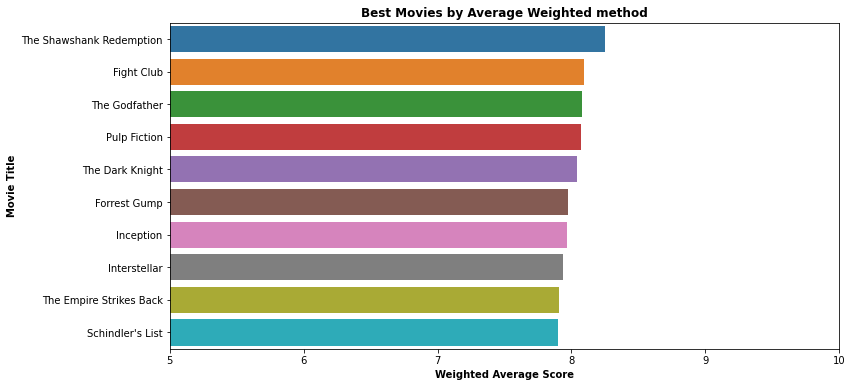

In [75]:
plt.figure(figsize=(12,6))
axis1=sns.barplot(x=newmc_sorted['weighted_average'].head(10), y=newmc_sorted['original_title'].head(10), data=weight_average)
plt.xlim(5, 10)
plt.title('Best Movies by Average Weighted method', weight='bold')
plt.xlabel('Weighted Average Score', weight='bold')
plt.ylabel('Movie Title', weight='bold')
plt.savefig('best_movies.png')

__Arranging the movies with Descending order of Popularity.__

In [77]:
pop=newmc_sorted.sort_values('popularity',ascending=False)
pop[['original_title', 'vote_count', 'vote_average', 'weighted_average', 'popularity']].head(10)

,original_title,vote_count,vote_average,weighted_average,popularity
546,Minions,4571,6.4,6.346682,875.581305
95,Interstellar,10867,8.1,7.937399,724.247784
788,Deadpool,10995,7.4,7.295221,514.569956
94,Guardians of the Galaxy,9742,7.9,7.738202,481.098624
127,Mad Max: Fury Road,9427,7.2,7.097843,434.278564
28,Jurassic World,8662,6.5,6.459402,418.708552
199,Pirates of the Caribbean: The Curse of the Bla...,6985,7.5,7.330265,271.972889
82,Dawn of the Planet of the Apes,4410,7.3,7.084519,243.791743
200,The Hunger Games: Mockingjay - Part 1,5584,6.6,6.525661,206.227151
88,Big Hero 6,6135,7.8,7.569419,203.734590


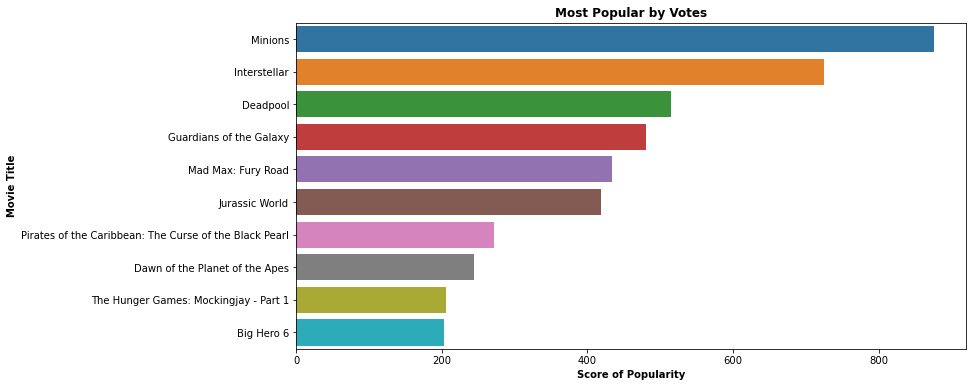

In [78]:
plt.figure(figsize=(12,6))
ax=sns.barplot(x=pop['popularity'].head(10), y=pop['original_title'].head(10), data=popularity)
plt.title('Most Popular by Votes', weight='bold')
plt.xlabel('Score of Popularity', weight='bold')
plt.ylabel('Movie Title', weight='bold')
plt.savefig('best_popular_movies.png')

*__Giving 50%-50% Weight to Wieghted average and popularity.__

__Normalizing the value because the scale of 'weighted_average' and'popularity' are different.__

In [81]:
from sklearn.preprocessing import MinMaxScaler

mms=MinMaxScaler()
newmc_scale=mms.fit_transform(newmc_sorted[['weighted_average','popularity']])
newmc_norm=pd.DataFrame(newmc_scale,columns=['weighted_average','popularity'])
newmc_norm.head()

,weighted_average,popularity
0,1.000000,0.156179
1,0.954528,0.167611
2,0.948933,0.164074
3,0.948137,0.138723
4,0.939029,0.213941


Merging the scaled data to our data set

In [87]:
newmc_sorted[['normalized_weight_average','normalized_popularity']]= newmc_norm

In [96]:
newmc_sorted.head(3)

,budget,genres,id,keywords,original_language,original_title,overview,popularity,production_companies,release_date,...,spoken_languages,tagline,vote_average,vote_count,cast,crew,weighted_average,normalized_weight_average,normalized_popularity,score
1881,25000000,"[{""id"": 18, ""name"": ""Drama""}, {""id"": 80, ""name...",278,"[{""id"": 378, ""name"": ""prison""}, {""id"": 417, ""n...",en,The Shawshank Redemption,Framed in the 1940s for the double murder of h...,136.747729,"[{""name"": ""Castle Rock Entertainment"", ""id"": 97}]",1994-09-23,...,"[{""iso_639_1"": ""en"", ""name"": ""English""}]",Fear can hold you prisoner. Hope can set you f...,8.5,8205,"[{""cast_id"": 3, ""character"": ""Andy Dufresne"", ...","[{""credit_id"": ""52fe4231c3a36847f800b153"", ""de...",8.248353,0.369287,0.003272,0.186279
662,63000000,"[{""id"": 18, ""name"": ""Drama""}]",550,"[{""id"": 825, ""name"": ""support group""}, {""id"": ...",en,Fight Club,A ticking-time-bomb insomniac and a slippery s...,146.757391,"[{""name"": ""Regency Enterprises"", ""id"": 508}, {...",1999-10-15,...,"[{""iso_639_1"": ""en"", ""name"": ""English""}]",Mischief. Mayhem. Soap.,8.3,9413,"[{""cast_id"": 4, ""character"": ""The Narrator"", ""...","[{""credit_id"": ""55731b8192514111610027d7"", ""de...",8.096134,0.471626,0.027515,0.249570
3337,6000000,"[{""id"": 18, ""name"": ""Drama""}, {""id"": 80, ""name...",238,"[{""id"": 131, ""name"": ""italy""}, {""id"": 699, ""na...",en,The Godfather,"Spanning the years 1945 to 1955, a chronicle o...",143.659698,"[{""name"": ""Paramount Pictures"", ""id"": 4}, {""na...",1972-03-14,...,"[{""iso_639_1"": ""en"", ""name"": ""English""}, {""iso...",An offer you can't refuse.,8.4,5893,"[{""cast_id"": 5, ""character"": ""Don Vito Corleon...","[{""credit_id"": ""52fe422bc3a36847f80093c9"", ""de...",8.077404,0.350318,0.015496,0.182907


__Creating a new Score Columns to store the Balanced value of 'weighted_average' and 'popularity' of movies.__

In [97]:
newmc_sorted['score'] = newmc_sorted['normalized_weight_average'] * 0.5 + newmc_sorted['normalized_popularity'] * 0.5
newmc_scored = newmc_sorted.sort_values(['score'], ascending=False)
newmc_scored[['original_title', 'normalized_weight_average', 'normalized_popularity', 'score']].head(10)

,original_title,normalized_weight_average,normalized_popularity,score
7,Avengers: Age of Ultron,0.907110,0.827162,0.867136
926,Garfield,0.431920,1.000000,0.715960
22,The Hobbit: The Desolation of Smaug,0.847604,0.549462,0.698533
113,Harry Potter and the Order of the Phoenix,0.715274,0.587690,0.651482
0,Avatar,1.000000,0.156179,0.578090
4,John Carter,0.939029,0.213941,0.576485
171,Master and Commander: The Far Side of the World,0.656312,0.495989,0.576150
1,Pirates of the Caribbean: At World's End,0.954528,0.167611,0.561070
10,Superman Returns,0.894242,0.219887,0.557065
2,Spectre,0.948933,0.164074,0.556503


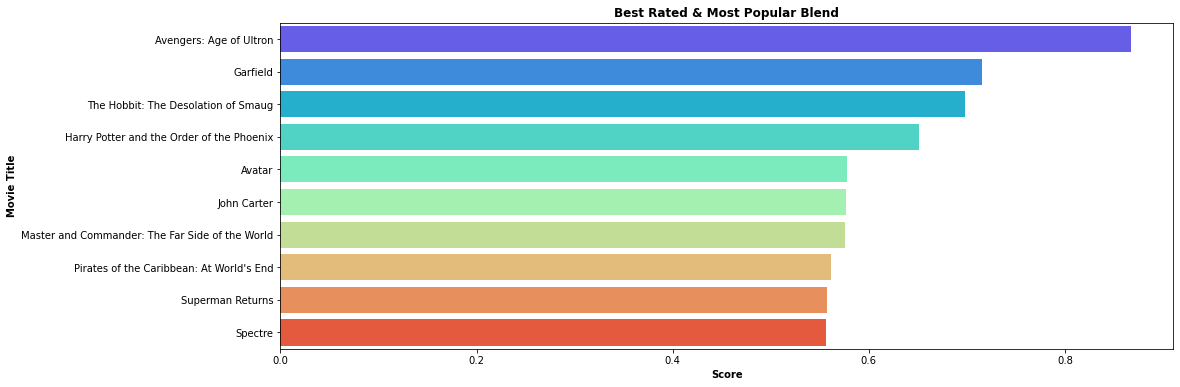

In [98]:
plt.figure(figsize=(16,6))
ax = sns.barplot(x=newmc_scored['score'].head(10), y=newmc_scored['original_title'].head(10), data=scored_df, palette='rainbow')
plt.title('Best Rated & Most Popular Blend', weight='bold')
plt.xlabel('Score', weight='bold')
plt.ylabel('Movie Title', weight='bold')
plt.savefig('scored_movies.png')